In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from keras.callbacks import EarlyStopping


In [42]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [43]:
#data = pd.read_csv(r'C:\Users\ekrsinh\OneDrive - Ericsson\Documents\Modelling_other\Earthquake Prediction Model with AI\silver.csv')
data  = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Earthquake Prediction Model with AI/silver.csv')

In [44]:
data.head()

,latitude,longitude,depth,mag,id,hour,date
0,34.189835,-117.58800,6.000,1.70,ci12317071,0,1973-01-01
1,-9.214000,150.63400,41.000,5.30,usp0000001,3,1973-01-01
2,48.308666,-122.11733,13.680,2.20,uw10840118,4,1973-01-01
3,-15.012000,-173.95800,33.000,5.00,usp0000002,5,1973-01-01
4,19.443666,-155.36084,7.302,1.85,hv19723167,7,1973-01-01


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855719 entries, 0 to 3855718
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   latitude   float64
 1   longitude  float64
 2   depth      float64
 3   mag        float64
 4   id         object 
 5   hour       int64  
 6   date       object 
dtypes: float64(4), int64(1), object(2)
memory usage: 205.9+ MB


# Data Preprocessing

In [48]:
type(data['date'])

pandas.core.series.Series

In [49]:
#data['hour'] = pd.to_datetime(data['hour'])
#data['hour'] = str(data['hour'])

In [50]:
type(data['date'][0])

str

In [51]:
type(data['hour'][0])

numpy.int64

In [52]:
data.head(20)

,latitude,longitude,depth,mag,id,hour,date
0,34.189835,-117.58800,6.000,1.70,ci12317071,0,1973-01-01
1,-9.214000,150.63400,41.000,5.30,usp0000001,3,1973-01-01
2,48.308666,-122.11733,13.680,2.20,uw10840118,4,1973-01-01
3,-15.012000,-173.95800,33.000,5.00,usp0000002,5,1973-01-01
4,19.443666,-155.36084,7.302,1.85,hv19723167,7,1973-01-01
5,-22.161000,-65.79200,205.000,4.80,usp0000003,9,1973-01-01
6,48.302500,-122.11933,13.700,2.40,uw10840128,11,1973-01-01
7,-35.513000,-16.21100,33.000,6.00,usp0000004,11,1973-01-01
8,47.585667,-123.06467,39.853,1.80,uw10840123,11,1973-01-01
9,13.743000,-45.26600,33.000,4.40,usp0000006,21,1973-01-01


## magnitude analysis

In [53]:
data['mag'] = data['mag'].astype(int)

Text(0, 0.5, 'Earthquake count')

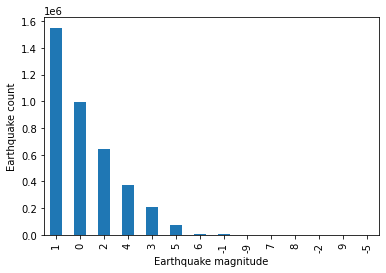

In [54]:
data['mag'].value_counts().plot.bar()
plt.xlabel('Earthquake magnitude')
plt.ylabel('Earthquake count')

### Energy calculation

In [55]:
data['energy'] = 5.24 + 1.44*data['mag']

In [56]:
data['energy'] = np.power(10, data['energy'])

In [57]:
data.head()

,latitude,longitude,depth,mag,id,hour,date,energy
0,34.189835,-117.58800,6.000,1,ci12317071,0,1973-01-01,4.786301e+06
1,-9.214000,150.63400,41.000,5,usp0000001,3,1973-01-01,2.754229e+12
2,48.308666,-122.11733,13.680,2,uw10840118,4,1973-01-01,1.318257e+08
3,-15.012000,-173.95800,33.000,5,usp0000002,5,1973-01-01,2.754229e+12
4,19.443666,-155.36084,7.302,1,hv19723167,7,1973-01-01,4.786301e+06


## Converting given date and time to Unix time.This will be in seconds.
The unix time stamp is a way to track time as a running total of seconds. This count starts at the Unix Epoch on January 1st, 1970 at UTC. Therefore, the unix time stamp is merely the number of seconds between a particular date and the Unix Epoch.

In [58]:
data['hour'] = data['hour']*60*60

In [59]:
timestamp = []
for d in data['date']:
    try:
        ts = datetime.datetime.strptime(d , '%Y-%m-%d') #strptime() is another method available in DateTime which is used to format the time stamp which is in string format to date-time object.
        #ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:  #erroneous value
        timestamp.append('ValueError')
TimeStamp = pd.Series(timestamp)
data['TimeStamp'] = TimeStamp.values
data_final = data.drop(['date'],axis = 1)
data_final = data_final[data_final.TimeStamp !='ValueError']
data_final.head()

,latitude,longitude,depth,mag,id,hour,energy,TimeStamp
0,34.189835,-117.58800,6.000,1,ci12317071,0,4.786301e+06,94694400.0
1,-9.214000,150.63400,41.000,5,usp0000001,10800,2.754229e+12,94694400.0
2,48.308666,-122.11733,13.680,2,uw10840118,14400,1.318257e+08,94694400.0
3,-15.012000,-173.95800,33.000,5,usp0000002,18000,2.754229e+12,94694400.0
4,19.443666,-155.36084,7.302,1,hv19723167,25200,4.786301e+06,94694400.0


In [60]:
data_final['TimeStamp_f'] = data_final['TimeStamp'] + data['hour']

In [61]:
data_final.head()

,latitude,longitude,depth,mag,id,hour,energy,TimeStamp,TimeStamp_f
0,34.189835,-117.58800,6.000,1,ci12317071,0,4.786301e+06,94694400.0,94694400.0
1,-9.214000,150.63400,41.000,5,usp0000001,10800,2.754229e+12,94694400.0,94705200.0
2,48.308666,-122.11733,13.680,2,uw10840118,14400,1.318257e+08,94694400.0,94708800.0
3,-15.012000,-173.95800,33.000,5,usp0000002,18000,2.754229e+12,94694400.0,94712400.0
4,19.443666,-155.36084,7.302,1,hv19723167,25200,4.786301e+06,94694400.0,94719600.0


In [62]:
data_final = data_final.drop(['hour','TimeStamp'],axis =1)
data_final.head()

,latitude,longitude,depth,mag,id,energy,TimeStamp_f
0,34.189835,-117.58800,6.000,1,ci12317071,4.786301e+06,94694400.0
1,-9.214000,150.63400,41.000,5,usp0000001,2.754229e+12,94705200.0
2,48.308666,-122.11733,13.680,2,uw10840118,1.318257e+08,94708800.0
3,-15.012000,-173.95800,33.000,5,usp0000002,2.754229e+12,94712400.0
4,19.443666,-155.36084,7.302,1,hv19723167,4.786301e+06,94719600.0


## Train - Test Split

In [63]:
X = data_final[['latitude','longitude','TimeStamp_f']] # Input data
y = data_final[['depth','mag']] # Output data

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2699003, 3), (1156716, 3), (2699003, 2), (1156716, 2))

In [66]:
from keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras import Sequential


In [67]:
tf.keras.backend.clear_session()
model = Sequential()
# 1st conv layer
model.add(Dense(32,activation='relu',input_shape = (3, ))) # 3 in input_shape denotes number of columns in input data

# second conv layer
model.add(Dense(32,activation='relu'))

model.add(Dense(2, activation='softmax'))


In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,250
Trainable params: 1,250
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])

In [70]:
# Callback implementation
# This callback will stop the training when there is no improvement in the loss for three consecutive epochs.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss',patience = 3,mode = 'auto')

In [71]:
history = model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(X_test, y_test),callbacks=[early_stopping],shuffle=True)

Epoch 1/10
168688/168688 [==============================] - 573s 3ms/step - loss: 0.5302 - accuracy: 0.9293 - val_loss: 0.5301 - val_accuracy: 0.9293
Epoch 2/10
168688/168688 [==============================] - 588s 3ms/step - loss: 0.5302 - accuracy: 0.9293 - val_loss: 0.5301 - val_accuracy: 0.9293
Epoch 3/10
168688/168688 [==============================] - 597s 4ms/step - loss: 0.5302 - accuracy: 0.9293 - val_loss: 0.5301 - val_accuracy: 0.9293
Epoch 4/10
168688/168688 [==============================] - 591s 4ms/step - loss: 0.5302 - accuracy: 0.9293 - val_loss: 0.5301 - val_accuracy: 0.9293
Epoch 5/10
168688/168688 [==============================] - 572s 3ms/step - loss: 0.5302 - accuracy: 0.9293 - val_loss: 0.5301 - val_accuracy: 0.9293


In [72]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


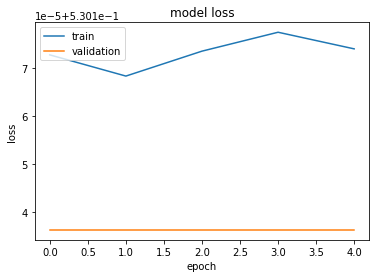

In [73]:
#Plotting model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [74]:
# Model evaluation
[test_loss, test_accuracy] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, Accuracy = {}".format(test_loss, test_accuracy))

36148/36148 [==============================] - 78s 2ms/step - loss: 0.5301 - accuracy: 0.9293
Evaluation result on Test Data : Loss = 0.5301416516304016, Accuracy = 0.9293473958969116
